In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from mpl_toolkits.mplot3d import Axes3D

Simple data matrix with N = 18, d = 3

In [2]:
D = np.array([[1,0, 1],
              [2,0, 1],
              [3,0, 1],
              [3,3, 1],
              [4,3, 1],
              [5,3, 1],
              [5,6, 1],
              [6,6, 1],
              [7,6, 1],
              [1,0, 0],
              [2,0, 0],
              [3,0, 0],
              [3,3, 0],
              [4,3, 0],
              [5,3, 0],
              [5,6, 0],
              [6,6, 0],
              [7,6, 0]])

D = D - np.mean(D, axis = 0) #center the data
print(D)

[[-3.  -3.   0.5]
 [-2.  -3.   0.5]
 [-1.  -3.   0.5]
 [-1.   0.   0.5]
 [ 0.   0.   0.5]
 [ 1.   0.   0.5]
 [ 1.   3.   0.5]
 [ 2.   3.   0.5]
 [ 3.   3.   0.5]
 [-3.  -3.  -0.5]
 [-2.  -3.  -0.5]
 [-1.  -3.  -0.5]
 [-1.   0.  -0.5]
 [ 0.   0.  -0.5]
 [ 1.   0.  -0.5]
 [ 1.   3.  -0.5]
 [ 2.   3.  -0.5]
 [ 3.   3.  -0.5]]


In [3]:
def pca(inputs, k = 2):
    X = inputs
    N, d = X.shape
    M = 1/N * np.dot(np.transpose(X), X) #covariance matrix
    print(M)
    e, v = LA.eig(M) #e = eigenvalues, v = eigenvectors
    idx = e.argsort()[::-1]   
    e = e[idx]
    v = v[:,idx]
    print("Eigenvectors:")
    print(v)
    P = v[:k,:] #take k first principal components i.e. first k rows
    X_p = np.dot(X, np.transpose(P))
    X_r = np.dot(X_p, P)

    return (X_p, X_r, P)

In [4]:
D_p, D_r, U = pca(D, k = 1)

[[3.33333333 4.         0.        ]
 [4.         6.         0.        ]
 [0.         0.         0.25      ]]
Eigenvectors:
[[-0.58471028 -0.81124219  0.        ]
 [-0.81124219  0.58471028  0.        ]
 [ 0.          0.          1.        ]]


Principal Components
[[-0.58471028 -0.81124219  0.        ]]
MSE 0.23343215103627588

Original (red) and reproduced (blue) data:


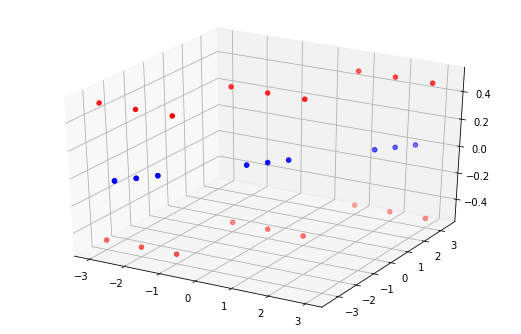

Projected Data


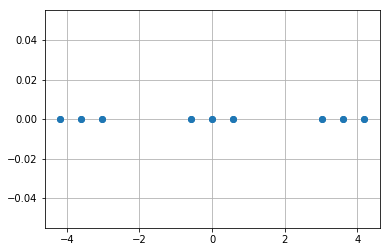

In [5]:
print("Principal Components")
print(U)
mse = np.mean((D - D_r)**2)
print("MSE", mse)

print("\nOriginal (red) and reproduced (blue) data:")
plt.figure(figsize = (20, 20))
ax = plt.subplot(321, projection='3d')
ax.scatter(D[:,0], D[:,1], D[:,2], c='r')
#ax = plt.subplot(322, projection='3d')
ax.scatter(D_r[:,0], D_r[:,1], D_r[:,2], c='b')
plt.show()

print("Projected Data")
plt.plot(D_p, np.zeros(18), 'o')
plt.grid(True)
plt.show()

Complete the below function s.t. the autoencoder has one hidden layer with k units and a linear activation function.

In [ ]:
def autoencoder(inputs, k = 2, t = 1e-5, maxIter=8000): #k = number of hidden units, t = threshold for delta loss    X = #ToDo
    X = #ToDo
    X_encoded = #Todo
    X_out = #ToDo
    loss = #ToDo
    optimizer = tf.train.AdamOptimizer().minimize(loss)
    
    i= 0
    with tf.Session() as sess:
        sess.run(tf.initializers.global_variables())
        delta = np.Inf 
        l = np.Inf 
        i= 0
        while (delta > t) and (i < maxIter):
            _, l_cur = sess.run([optimizer, loss], feed_dict={X: inputs})
            delta = l - l_cur
            if (i == 0)  or (i+1) %500 == 0:
                print("Iteration %d. Loss: %.3f" % (i+1, l_cur))
            delta = l - l_cur
            l = l_cur
            i += 1
        print("Iteration %d. Final loss: %.3f" % (i, l_cur))
        
        X_r, X_p =  #ToDo get reconstructed/decoded data (X_out) and projected data (X_encoded)
        W =         #ToDo get weights
        
        return (X_r, X_p, W)

In [ ]:
A_r, A_p, W = autoencoder(D, k=1)

In [ ]:
print("Weights")
print(W)
mse = np.mean((D - A_r)**2)
print("MSE", mse)

print("\nOriginal (red) and reproduced (blue) data:")
plt.figure(figsize = (20, 20))
ax = plt.subplot(321, projection='3d')
ax.scatter(D[:,0], D[:,1], D[:,2], c='r')
#ax = plt.subplot(322, projection='3d')
ax.scatter(A_r[:,0], A_r[:,1], A_r[:,2], c='b')
plt.show()

print("Projected data")
plt.plot(A_p[:,0],np.zeros(18), 'o')
plt.grid(True)
plt.show()

Compare the results!

Apply the above simple autoencoder to the digit 3 of the MNIST dataset and plot the results. What could you improve?

In [ ]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()